In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
iris=pd.read_csv("iris.csv")

In [5]:
# let's see first and last five rows
iris.head().append(iris.tail())

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


# Exploratory Data Analysis

In [7]:
iris.shape

(150, 6)

In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
# Dropping Unnecesary columns
iris.drop('Id',axis=1,inplace=True)

In [14]:
iris.duplicated().sum()

3

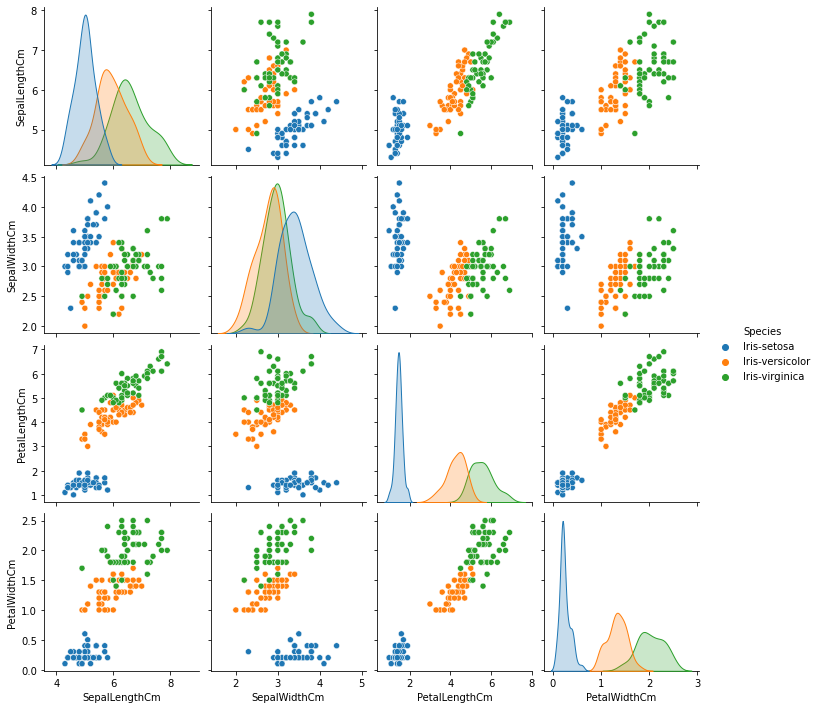

In [17]:
# Plots
sns.pairplot(iris,hue='Species')

# Scatter Plot

C:\Users\balag\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


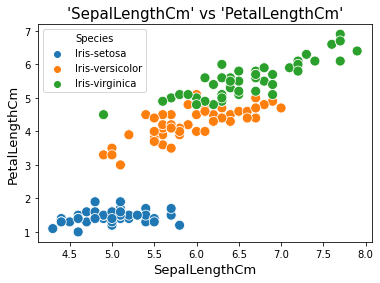

In [22]:
sns.scatterplot(iris['SepalLengthCm'],iris['PetalLengthCm'],hue=iris['Species'],s=100)
plt.title("'SepalLengthCm' vs 'PetalLengthCm'",fontsize=15)
plt.xlabel('SepalLengthCm',fontsize=13)
plt.ylabel('PetalLengthCm',fontsize=13)
plt.show()

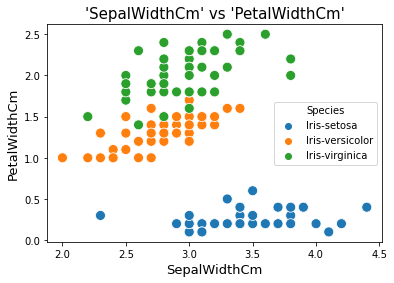

In [28]:
sns.scatterplot(x='SepalWidthCm',y='PetalWidthCm',hue='Species',s=100,data=iris)
plt.title("'SepalWidthCm' vs 'PetalWidthCm'",fontsize=15)
plt.xlabel('SepalWidthCm',fontsize=13)
plt.ylabel('PetalWidthCm',fontsize=13)
plt.show()

# Box Plot

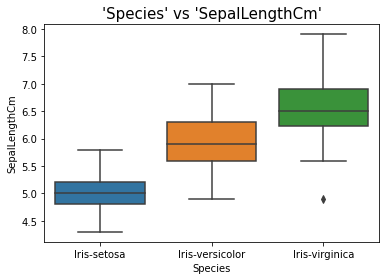

In [30]:
sns.boxplot(x='Species',y='SepalLengthCm',data=iris)
plt.title("'Species' vs 'SepalLengthCm'",fontsize=15)
plt.show()

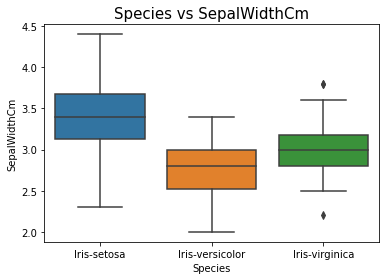

In [32]:
sns.boxplot(x="Species",y='SepalWidthCm',data=iris)
plt.title("Species vs SepalWidthCm",fontsize=15)
plt.show()

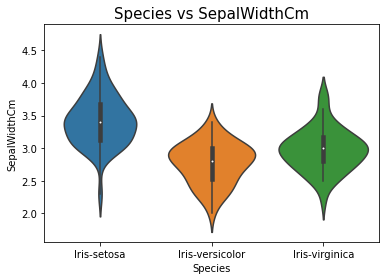

In [37]:
sns.violinplot(x="Species",y='SepalWidthCm',data=iris)
plt.title("Species vs SepalWidthCm",fontsize=15)
plt.show()

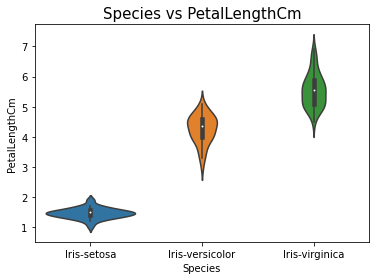

In [33]:
sns.violinplot(x="Species",y='PetalLengthCm',data=iris)
plt.title("Species vs PetalLengthCm",fontsize=15)
plt.show()

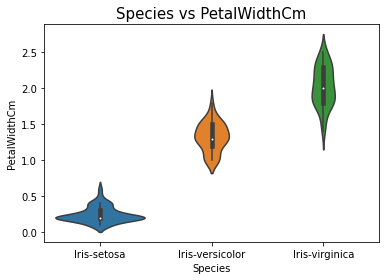

In [38]:
sns.violinplot(x="Species",y='PetalWidthCm',data=iris)
plt.title("Species vs PetalWidthCm",fontsize=15)
plt.show()

# Data Preprocessing

In [39]:
# Checking Null Values
iris.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(iris[['SepalLengthCm']])
iris['SSepalLengthCm'] = scaler.transform(iris[['SepalLengthCm']])

scaler.fit(iris[['SepalWidthCm']])
iris['SSepalWidthCm'] = scaler.transform(iris[['SepalWidthCm']])

scaler.fit(iris[['PetalLengthCm']])
iris['SPetalLengthCm'] = scaler.transform(iris[['PetalLengthCm']])


scaler.fit(iris[['PetalWidthCm']])
iris['SPetalWidthCm'] = scaler.transform(iris[['PetalWidthCm']])

# Building Model

In [45]:
from sklearn.cluster import KMeans

# Elbow Method

In [47]:
inertias = []

clust = range(1, 10)
 
for k in clust:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(iris[['SSepalLengthCm', 'SSepalWidthCm', 'SPetalLengthCm',
       'SPetalWidthCm']])
    
    iner = kmeanModel.inertia_
    inertias.append(iner)

C:\Users\balag\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


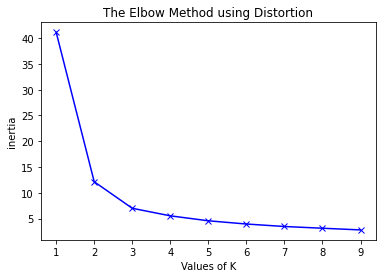

In [48]:
plt.plot(clust, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('inertia')
plt.title('The Elbow Method using Distortion')
plt.show()

In [64]:
print('optimum clusters:3')

optimum clusters:3


In [80]:
iris.iloc[:,5:]

,SSepalLengthCm,SSepalWidthCm,SPetalLengthCm,SPetalWidthCm
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [82]:
# Converting 2d into 1 d array to fit in the model
x=iris.iloc[:,5:].values
x

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [66]:
# Fitting the model
kmean=KMeans(n_clusters=3,init='random',random_state=42,max_iter=400,tol=0.0005,n_init=30)
y_predicted = kmean.fit_predict(x)

In [85]:
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [89]:
x[y_predicted==0,1]

array([0.5       , 0.125     , 0.33333333, 0.33333333, 0.54166667,
       0.16666667, 0.375     , 0.29166667, 0.        , 0.41666667,
       0.08333333, 0.375     , 0.375     , 0.45833333, 0.41666667,
       0.29166667, 0.08333333, 0.20833333, 0.5       , 0.33333333,
       0.20833333, 0.33333333, 0.375     , 0.41666667, 0.33333333,
       0.375     , 0.25      , 0.16666667, 0.16666667, 0.29166667,
       0.29166667, 0.41666667, 0.58333333, 0.45833333, 0.125     ,
       0.41666667, 0.20833333, 0.25      , 0.41666667, 0.25      ,
       0.125     , 0.29166667, 0.41666667, 0.375     , 0.375     ,
       0.20833333, 0.33333333, 0.29166667, 0.20833333, 0.20833333,
       0.08333333, 0.33333333, 0.29166667, 0.33333333, 0.41666667,
       0.33333333, 0.25      , 0.41666667, 0.29166667, 0.20833333,
       0.41666667])

# Centroids

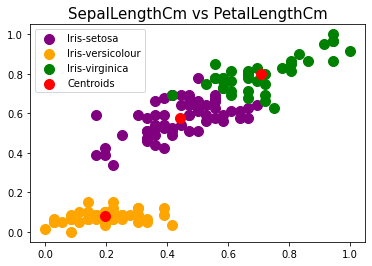

In [100]:
#Visualising the clusters between SepalLengthCm vs PetalLengthCm

plt.scatter(x[y_predicted == 0, 0], x[y_predicted == 0, 2], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_predicted == 1, 0], x[y_predicted == 1, 2], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_predicted == 2, 0], x[y_predicted == 2, 2], s = 100, c = 'green', label = 'Iris-virginica')



#Plotting the centroids of the clusters between SepalLengthCm vs PetalLengthCm

plt.scatter(kmean.cluster_centers_[:,0], kmean.cluster_centers_[:,2], s = 100, c = 'r', label = 'Centroids')
plt.title('SepalLengthCm vs PetalLengthCm',fontsize=15)
plt.legend()

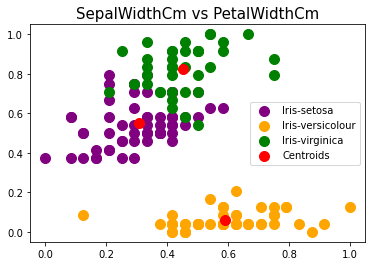

In [101]:
#Visualising the clusters b/w SepalWidthCm vs PetalWidthCm

plt.scatter(x[y_predicted == 0,1], x[y_predicted == 0,3], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_predicted == 1,1], x[y_predicted == 1,3], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_predicted == 2,1], x[y_predicted == 2,3], s = 100, c = 'green', label = 'Iris-virginica')


#Plotting the centroids of the clusters b/w SepalWidthCm vs PetalWidthCm

plt.scatter(kmean.cluster_centers_[:,1], kmean.cluster_centers_[:,3], s = 100, c = 'red', label = 'Centroids')
plt.title('SepalWidthCm vs PetalWidthCm',fontsize=15)
plt.legend()

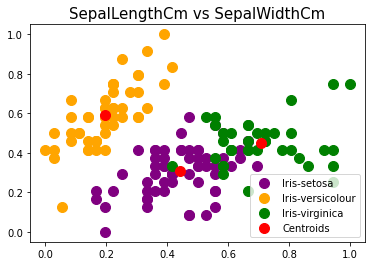

In [102]:
#Visualising the clusters b/w SepalLengthCm vs SepalWidthCm

plt.scatter(x[y_predicted == 0,0], x[y_predicted == 0,1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_predicted == 1,0], x[y_predicted == 1,1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_predicted == 2,0], x[y_predicted == 2,1], s = 100, c = 'green', label = 'Iris-virginica')


#Plotting the centroids of the clusters b/w SepalLengthCm vs SepalWidthCm

plt.scatter(kmean.cluster_centers_[:,0], kmean.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.title('SepalLengthCm vs SepalWidthCm',fontsize=15)
plt.legend()

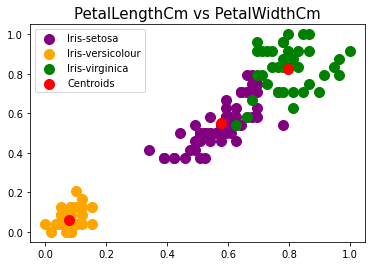

In [103]:
#Visualising the clusters b/w PetalLengthCm vs PetalWidthCm

plt.scatter(x[y_predicted == 0,2], x[y_predicted == 0,3], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_predicted == 1,2], x[y_predicted == 1,3], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_predicted == 2,2], x[y_predicted == 2,3], s = 100, c = 'green', label = 'Iris-virginica')


#Plotting the centroids of the clusters b/w PetalLengthCm vs PetalWidthCm

plt.scatter(kmean.cluster_centers_[:,2], kmean.cluster_centers_[:,3], s = 100, c = 'red', label = 'Centroids')
plt.title('PetalLengthCm vs PetalWidthCm',fontsize=15)
plt.legend()

In [107]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Y=le.fit_transform(iris.iloc[:,4])

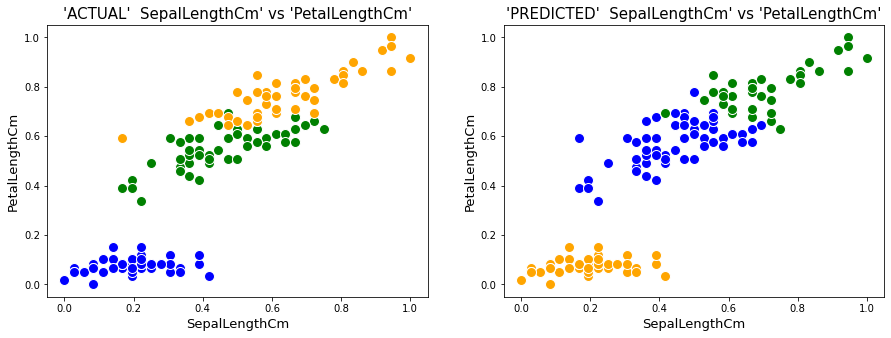

In [108]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax2.scatter(x[y_predicted == 0, 0], x[y_predicted == 0, 2], s = 100, c = 'blue', label = 'Iris-setosa',edgecolor='white')
ax2.scatter(x[y_predicted == 1, 0], x[y_predicted == 1, 2], s = 100, c = 'orange', label = 'Iris-versicolour',edgecolor='white')
ax2.scatter(x[y_predicted == 2, 0], x[y_predicted == 2, 2], s = 100, c = 'green', label = 'Iris-virginica',edgecolor='white')
ax2.set_title("'PREDICTED'  SepalLengthCm' vs 'PetalLengthCm'",fontsize=15)
ax2.set_xlabel('SepalLengthCm',fontsize=13)
ax2.set_ylabel('PetalLengthCm',fontsize=13)


ax1.scatter(x[Y == 0, 0], x[Y == 0, 2], s = 100, c = 'blue', label = 'Iris-setosa',edgecolor='white')
ax1.scatter(x[Y == 1, 0], x[Y == 1, 2], s = 100, c = 'green', label = 'Iris-versicolour',edgecolor='white')
ax1.scatter(x[Y == 2, 0], x[Y == 2, 2], s = 100, c = 'orange', label = 'Iris-virginica',edgecolor='white')
ax1.set_title("'ACTUAL'  SepalLengthCm' vs 'PetalLengthCm'",fontsize=15)
ax1.set_xlabel('SepalLengthCm',fontsize=13)
ax1.set_ylabel('PetalLengthCm',fontsize=13)
plt.show()